In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances

# Data Preparation

In [ ]:
# Reading the data & Initial Quick Exploration

url = "https://drive.google.com/file/d/1zFthUGGXT1p6Zmj5e9kL3XzfFbCnWm2T/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
df_audio_features_5000 = pd.read_csv(path)

df_audio_features_5000.head(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [ ]:
# Dropping unwanted features

# df_audio_features_5000.dropna(inplace=True) # There was no NA values
# len(df_audio_features_5000) # 5235 rows

# Strip whitespaces from column names
df_audio_features_5000.columns = df_audio_features_5000.columns.str.strip()

# Drop unncessary columns
df_dropped = df_audio_features_5000.drop(['name','artist','type','time_signature','id','html'], axis=1)
df_dropped.head()

# type: it is empty
# time_signature: only has 0, 1, 2, 3 or 4 (it is rather like a cateogrical variable, especially because those are not ordinal)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213
1,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867
2,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267
3,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227
4,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680


In [ ]:
# Checking data types of each column
df_dropped.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object

- acousticness: 

  A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
  (Float)

- danceability:

  Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
  (Float)

- duration_ms:

  The duration of the track in milliseconds.
  (Integer)

- energy:

  Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
  (Float)

- instrumentalness:

  Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
  (Float)

- key:

  The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
  (Integer)

- liveness:

  Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
  (Float)

- loudness:

  The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
  (Float)

- mode:

  Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. 
  (Integer)

- speechiness:

  Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
  (Float)

- tempo:

  The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
  (Float)

- time_signature:

  An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). 	(Integer)

- valence:

  A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
  (Float)


    Data preparation:
        Reading the data
        Initial quick exploration
        Dropping unwanted features

    Modelling:
        Data scaling (potentially, other transformations)
        K-Means exploration of clusters (elbow method, silhouette coefficient…)
        K-Means final model
        
    Cluster exploration:
        Univariate and bivariate exploration of the clusters
        Manual labelling of the clusters


# Modelling

In [ ]:
# Data scaling

# Import all scalers for testing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Create DataFrames of scaled values

# MinMax
scaled_minmax = MinMaxScaler().fit_transform(df_dropped)
df_minmax = pd.DataFrame(scaled_minmax, columns=df_dropped.columns, index=df_dropped.index)

# Standard
scaled_standard = StandardScaler().fit_transform(df_dropped)
df_standard = pd.DataFrame(scaled_standard, columns=df_dropped.columns, index=df_dropped.index)

# Robust
scaled_robust = RobustScaler().fit_transform(df_dropped)
df_robust = pd.DataFrame(scaled_robust, columns=df_dropped.columns, index=df_dropped.index)

# Quantile
scaled_quantile = QuantileTransformer(n_quantiles=len(df_dropped)).fit_transform(df_dropped)
df_quantile = pd.DataFrame(scaled_quantile, columns=df_dropped.columns, index=df_dropped.index)

# Power
scaled_power = PowerTransformer().fit_transform(df_dropped)
df_power = pd.DataFrame(scaled_power, columns=df_dropped.columns, index=df_dropped.index)

In [ ]:
# Making the DataFrames for the heatmap
df_dropped_distances = pd.DataFrame(pairwise_distances(df_dropped), index=df_dropped.index, columns=df_dropped.index) # original
df_minmax_distances = pd.DataFrame(pairwise_distances(df_minmax), index=df_minmax.index, columns=df_minmax.index)
df_standard_distances = pd.DataFrame(pairwise_distances(df_standard), index=df_standard.index, columns=df_standard.index)
df_robust_distances = pd.DataFrame(pairwise_distances(df_robust), index=df_robust.index, columns=df_robust.index)
df_quantile_distances = pd.DataFrame(pairwise_distances(df_quantile), index=df_quantile.index, columns=df_quantile.index)
df_power_distances = pd.DataFrame(pairwise_distances(df_power), index=df_power.index, columns=df_power.index)

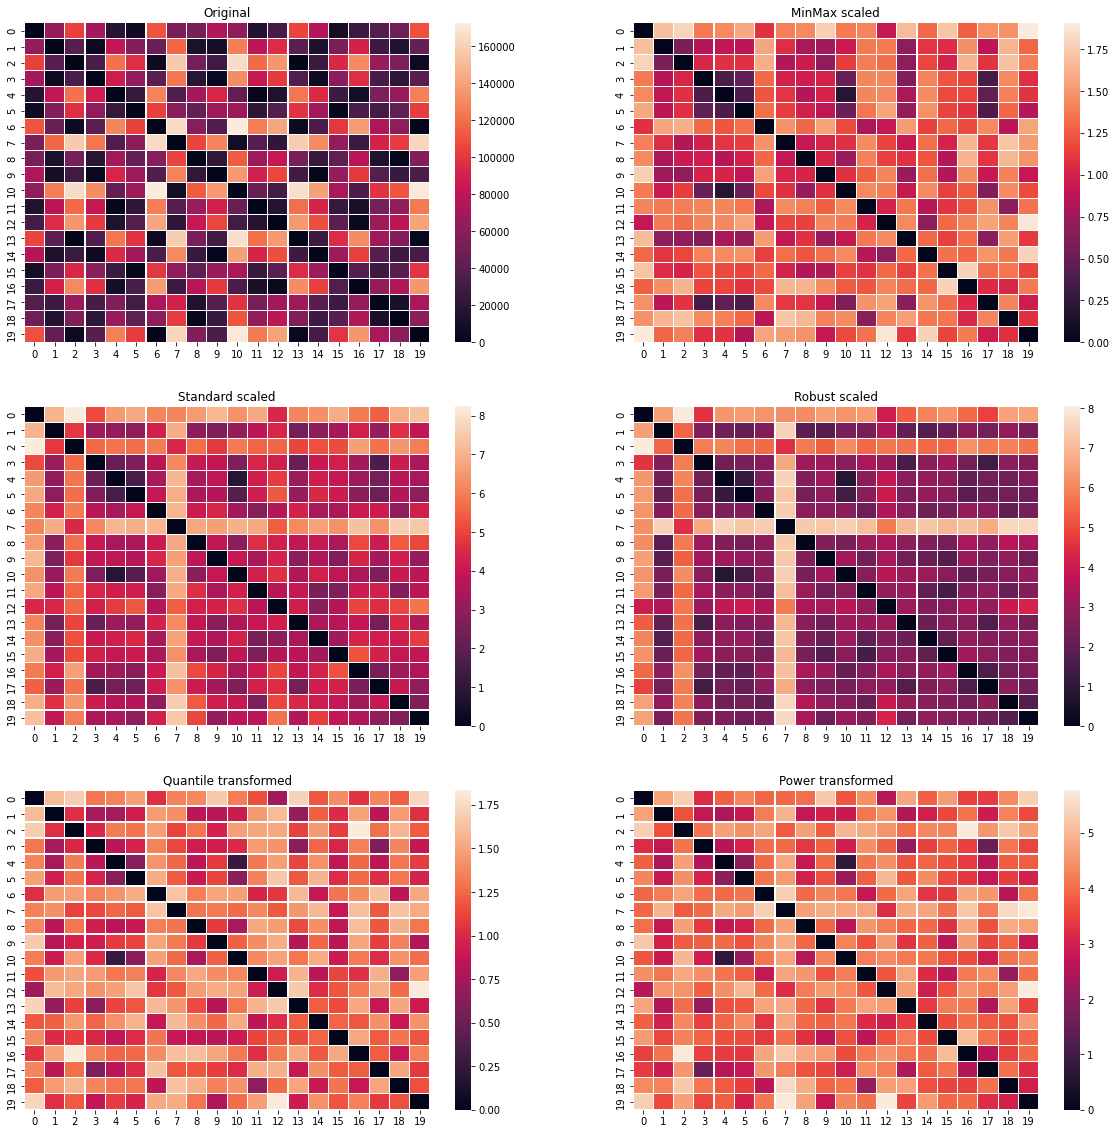

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Here, I used only first 20 songs since plotting heatmaps with 5000 songs was not a good idea
sns.heatmap(df_dropped_distances.iloc[:20,:20], ax=ax[0, 0], linewidths=.2);
sns.heatmap(df_minmax_distances.iloc[:20,:20], ax=ax[0, 1], linewidths=.2);
sns.heatmap(df_standard_distances.iloc[:20,:20], ax=ax[1, 0], linewidths=.2);
sns.heatmap(df_robust_distances.iloc[:20,:20], ax=ax[1, 1], linewidths=.2);
sns.heatmap(df_quantile_distances.iloc[:20,:20], ax=ax[2, 0], linewidths=.2);
sns.heatmap(df_power_distances.iloc[:20,:20], ax=ax[2, 1], linewidths=.2);

ax[0, 0].set_title('Original')
ax[0, 1].set_title('MinMax scaled')
ax[1, 0].set_title('Standard scaled')
ax[1, 1].set_title('Robust scaled')
ax[2, 0].set_title('Quantile transformed')
ax[2, 1].set_title('Power transformed')

plt.show()

I decided to go with quantile transformer!



In [ ]:
# Before proceeding, pick out three features for visualisation
three_features = df_quantile[['danceability','energy', 'acousticness']]

# Making the DataFrames for the heatmap
three_feature_distances = pd.DataFrame(pairwise_distances(three_features), index=three_features.index, columns=three_features.index)
three_feature_distances.head()

,0,1,2,3,4,5,6,7,8,9,...,5225,5226,5227,5228,5229,5230,5231,5232,5233,5234
0,0.000000,0.232414,0.438479,0.152555,0.114116,0.314587,0.135829,0.426757,0.189764,0.549916,...,0.690606,0.704536,0.374851,0.392441,0.714295,0.622236,0.632641,0.726337,0.695377,0.415456
1,0.232414,0.000000,0.329349,0.310144,0.334308,0.523460,0.338425,0.509659,0.146029,0.525908,...,0.844424,0.886471,0.566081,0.596064,0.893823,0.804589,0.806584,0.910226,0.872057,0.597408
2,0.438479,0.329349,0.000000,0.509764,0.520527,0.702396,0.478783,0.514076,0.278863,0.315547,...,1.018026,1.069535,0.748390,0.774330,1.069070,0.987882,0.989560,1.097059,1.062598,0.808140
3,0.152555,0.310144,0.509764,0.000000,0.102110,0.377512,0.114945,0.565164,0.311581,0.665111,...,0.779297,0.765597,0.451206,0.452795,0.780839,0.686962,0.704960,0.782463,0.758365,0.480305
4,0.114116,0.334308,0.520527,0.102110,0.000000,0.281289,0.072602,0.484509,0.297116,0.625755,...,0.687303,0.675783,0.356548,0.358213,0.689097,0.596151,0.613846,0.694138,0.669978,0.394466


In [ ]:
from sklearn.cluster import KMeans

# Based on the quick look to the scatter plot, 
# we are going to assume there can be 3 different species so our k = 3. 
kmeans = KMeans(n_clusters=3)
kmeans.fit(three_features)  # Compute k-means clustering

KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[0.36263425, 0.15514903, 0.84463815],
       [0.23041758, 0.8084528 , 0.16457489],
       [0.75303023, 0.51228021, 0.50491651]])

In [ ]:
# Three features that we are interested in
columns = ['danceability','energy', 'acousticness']

# Put the coordinates of centroids into a dataframe
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = columns
centroids

,danceability,energy,acousticness
0,0.362634,0.155149,0.844638
1,0.230418,0.808453,0.164575
2,0.753030,0.512280,0.504917


In [ ]:
plot_data = pd.DataFrame(three_features)
plot_data.columns = columns

plot_data['cluster'] = kmeans.labels_

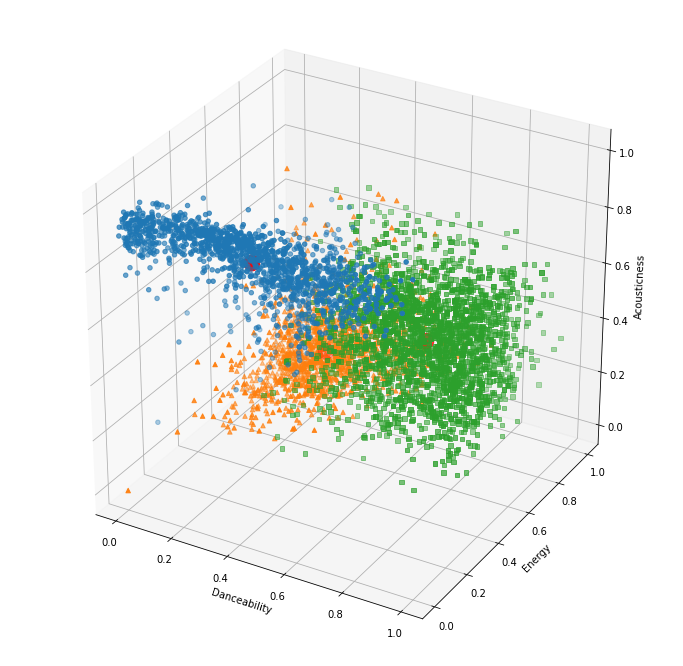

In [ ]:
import matplotlib.pyplot as plt
import random
colors = ['r','g','b']
markers = ['o', '^','s']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# ax.scatter(plot_data['bill_depth_mm'], plot_data['bill_length_mm'], plot_data['flipper_length_mm'])
for marker, d in plot_data.groupby('cluster'):
    ax.scatter(d['danceability'], d['energy'], d['acousticness'], marker=markers[marker], label=d['cluster'])
ax.scatter(centroids['danceability'], centroids['energy'], centroids['acousticness'], color='red', s=250)
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Acousticness')
plt.show()

In [ ]:
# Using most features (except for key, mode, liveness & duration_ms): danceability 	energy	loudness	speechiness 	acousticness 	instrumentalness 	valence 	tempo
selected_features = df_quantile[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','valence','tempo']]
#eight_feature_distances = pd.DataFrame(pairwise_distances(eight_features), index=eight_features.index, columns=eight_features.index)
selected_features.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,0.701662,0.145969,0.187142,0.615399,0.791173,0.385460,0.376576,0.409534
1,0.834066,0.206916,0.203764,0.155808,0.610145,0.268055,0.762323,0.593332
2,0.962457,0.490638,0.260986,0.986626,0.717329,0.388804,0.942205,0.196408
3,0.780378,0.037830,0.096485,0.399217,0.864540,0.373710,0.609954,0.371227
4,0.689243,0.079862,0.075468,0.230225,0.883359,0.443256,0.486339,0.529996


## Intertia

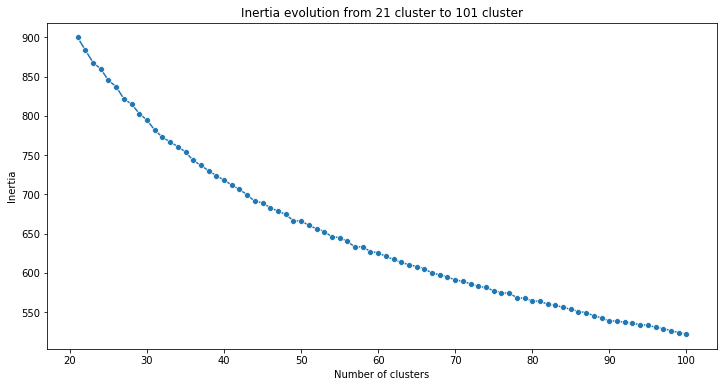

In [ ]:
min_k = 21
max_k = 101
inertia = []

# Supposing that there are at least 50 songs at least & 250 songs at most, we can infer that there should be between 101 and 21 clusters (Between 5235/50 AND 5235/250)
for k in range(min_k, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(selected_features).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from {min_k} cluster to {max_k} cluster')
sns.lineplot(x=range(min_k, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Silhouette Score

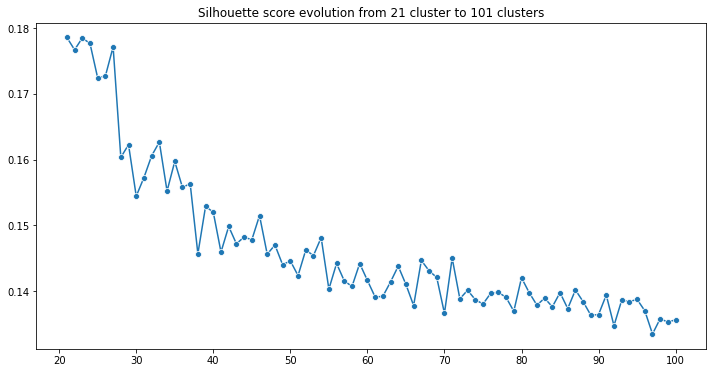

In [ ]:
from sklearn.metrics import silhouette_score

min_k = 21
max_k = 101
sil_score = []

for k in range(min_k, max_k): 
    labels = KMeans(n_clusters=k).fit(selected_features).labels_
    sil_score.append(silhouette_score(selected_features, labels))

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Silhouette score evolution from {min_k} cluster to {max_k} clusters')
sns.lineplot(x=range(min_k, max_k), y=sil_score, marker='o')
plt.show()

In [ ]:
# Creating a function that will rescale/transform the data, calculate Inertia and Silhuoette Score

def check_cluster(df, features, scaler, k):
  # Create DataFrames of scaled values
  scaled_df = []
  if scaler == 'minmax':
    scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(df[features]), columns=df[features].columns, index=df[features].index)
  elif scaler == 'standard':
    scaled_df = pd.DataFrame(StandardScaler().fit_transform(df[features]), columns=df[features].columns, index=df[features].index)
  elif scaler == 'robust':
    scaled_df = pd.DataFrame(RobustScaler().fit_transform(df[features]), columns=df[features].columns, index=df[features].index)
  elif scaler == 'quantile':
    scaled_df = pd.DataFrame(QuantileTransformer(n_quantiles=len(df[features])).fit_transform(df[features]), columns=df[features].columns, index=df[features].index)
  elif scaler == 'power':
    scaled_df = pd.DataFrame(PowerTransformer().fit_transform(df[features]), columns=df[features].columns, index=df[features].index)

  
  # Clustering 
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_df) 

  # Getting centroids
  centroids = pd.DataFrame(kmeans.cluster_centers_)
  centroids.columns = features

  # Plot a 2D scatter plot
  fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 20))
  # Add a cluster column where the cluster of each song will be indicated
  scaled_df['cluster'] = kmeans.labels_

  sns.scatterplot(data=scaled_df, x=features[0], y=features[1], hue='cluster', palette='Set2', s=75, ax=ax1)
  sns.scatterplot(data=centroids, x=features[0], y=features[1], color='red', s=250, ax=ax1)


  # Plot Inertias
  min_k = k - 10
  max_k = k + 10
  inertia = []
  sil_score = []

  for k in range(min_k, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(scaled_df).inertia_)
  ax2.set_title(f'Inertia evolution from {min_k} cluster to {max_k} cluster')
  sns.lineplot(x=range(min_k, max_k), y=inertia, marker='o', ax=ax2)
  ax2.set_xlabel('Number of clusters')
  ax2.set_ylabel('Inertia')

  # Plot Silhouette Scores

  for k in range(min_k, max_k): 
    labels = KMeans(n_clusters=k).fit(scaled_df).labels_
    sil_score.append(silhouette_score(scaled_df, labels))

  ax3.set_title(f'Silhouette score evolution from {min_k} cluster to {max_k} clusters')
  sns.lineplot(x=range(min_k, max_k), y=sil_score, marker='o', ax=ax3)
  ax3.set_ylabel('Silhouette Score')
  plt.show()

  # Calculate the exact Inertia
  inertia = ''
  inertia = kmeans.inertia_

  # Calculate the exact Silhouette Score
  sil_score = ''
  labels = kmeans.labels_
  sil_score = silhouette_score(scaled_df, labels)

  #return scaled_df
  return inertia, sil_score

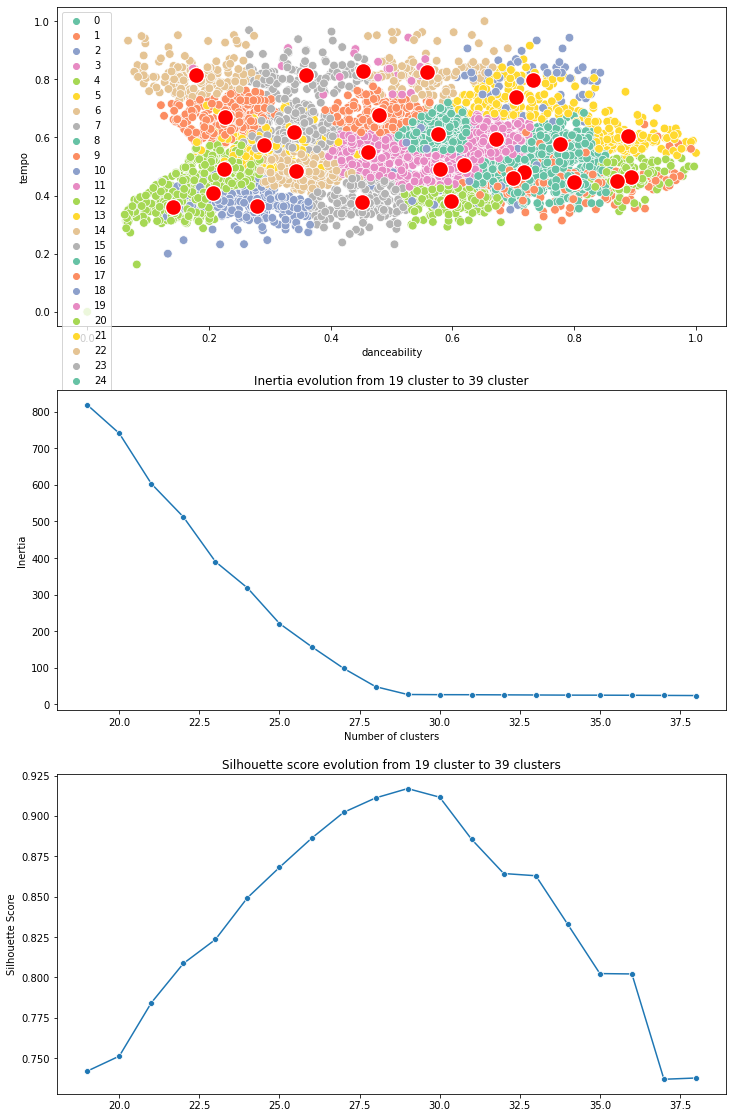

(26.883624432962897, 0.9169168651444619)

In [ ]:
df = df_dropped
features = ['danceability', 'tempo', 'speechiness']
scaler = 'minmax'
k = 29

check_cluster(df, features, scaler, k)

In [ ]:
# Deciding scaler/transformer type
# (23.808530128974468, 0.9224601983221306) quantile, 30, 'danceability','energy'
# (18.44316230268842, 0.9332243775708025) minmax, 30, 'danceability','energy'
# (18.00212940118834, 0.9334461969571293) qunatile, 40, 'danceability','energy'
# (13.83606114483706, 0.9407630909253882) minmax, 40, 'danceability','energy'

# Deciding features
# (23.34646138265053, 0.9222851663935208) minmax, 40, 'danceability','energy','loudness'
# (26.397118725080787, 0.9196355723248967) minmax, 40, 'danceability','energy', 'speechiness'
# (44.99419067714584, 0.9003236234665281) minmax, 40, 'danceability','energy', 'acousticness' OUT
# (43.57200617899732, 0.9025024662610664) minmax, 40, 'danceability','energy', 'instrumentalness' OUT
# (59.37826312601409, 0.8778509451877647) minmax, 40, 'danceability','energy', 'valence' OUT 
# (8.976030020463762, 0.9512396365463711) minmax, 40, 'danceability','tempo'
# (21.387654075182166, 0.9252147849294927) minmax, 40, 'danceability','tempo', 'speechiness'
